In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from scipy.stats import rankdata
from tqdm import tqdm
from pathlib import Path
from uco.data_loader import pivot_df

In [3]:
N = 3698
C = 4
H = 350
W = 525
ds_name = 'average'

In [4]:
def read(f):
    path = Path('../data/raw/test_images') / f
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
df = pd.read_csv('../data/raw/sample_submission.csv')
idx = np.random.choice(np.arange(df.shape[0] // 4))
with h5py.File('../data/predictions/avg-seg-predictions.h5', 'r') as f:
    p = f[ds_name][idx, :, :, :]
img_filename = df.iloc[idx * 4]['Image_Label'].split('_')[0]
img = read(img_filename)
fig, axs = plt.subplots(1, 5, figsize=(40, 12))
axs[0].imshow(img)
axs[1].imshow(p[0, :, :])
axs[2].imshow(p[1, :, :])
axs[3].imshow(p[2, :, :])
axs[4].imshow(p[3, :, :])
plt.show()

In [5]:
def get_df():
    df = pd.read_csv('../data/raw/gibs.csv')
    df = pivot_df(df).reset_index()[['Image']]
    return df

In [22]:
with h5py.File('../data/original/avg-seg-predictions.h5', 'r') as f:
    group_names = [k for k in f.keys() if k != 'average']
    for c in range(4):
        df = get_df()
        for k in tqdm(group_names):
            preds = f[k][:, c, :, :]
            totals = np.sum(preds, axis=1)
            totals = np.sum(totals, axis=1)
            print(totals.shape)
            ranks = rankdata(totals)
            df[k] = ranks
        df.to_csv(f'pseudo-ranks-class-{c}.csv', index=False)

  9%|▉         | 1/11 [00:05<00:55,  5.57s/it]

(4211,)


 18%|█▊        | 2/11 [00:10<00:48,  5.43s/it]

(4211,)


 27%|██▋       | 3/11 [00:16<00:43,  5.46s/it]

(4211,)


 36%|███▋      | 4/11 [00:21<00:37,  5.37s/it]

(4211,)


 45%|████▌     | 5/11 [00:26<00:32,  5.42s/it]

(4211,)


 55%|█████▍    | 6/11 [00:32<00:27,  5.50s/it]

(4211,)


 64%|██████▎   | 7/11 [00:38<00:22,  5.54s/it]

(4211,)


 73%|███████▎  | 8/11 [00:43<00:16,  5.49s/it]

(4211,)


 82%|████████▏ | 9/11 [00:49<00:11,  5.59s/it]

(4211,)


 91%|█████████ | 10/11 [00:54<00:05,  5.42s/it]

(4211,)


  0%|          | 0/11 [00:00<?, ?it/s]

(4211,)


  9%|▉         | 1/11 [00:05<00:53,  5.37s/it]

(4211,)


 18%|█▊        | 2/11 [00:10<00:48,  5.36s/it]

(4211,)


 27%|██▋       | 3/11 [00:15<00:42,  5.31s/it]

(4211,)


 36%|███▋      | 4/11 [00:21<00:37,  5.30s/it]

(4211,)


 45%|████▌     | 5/11 [00:26<00:31,  5.27s/it]

(4211,)


 55%|█████▍    | 6/11 [00:31<00:26,  5.27s/it]

(4211,)


 64%|██████▎   | 7/11 [00:36<00:21,  5.28s/it]

(4211,)


 73%|███████▎  | 8/11 [00:42<00:15,  5.29s/it]

(4211,)


 82%|████████▏ | 9/11 [00:47<00:10,  5.28s/it]

(4211,)


 91%|█████████ | 10/11 [00:52<00:05,  5.24s/it]

(4211,)


  0%|          | 0/11 [00:00<?, ?it/s]

(4211,)


  9%|▉         | 1/11 [00:05<00:53,  5.34s/it]

(4211,)


 18%|█▊        | 2/11 [00:10<00:47,  5.32s/it]

(4211,)


 27%|██▋       | 3/11 [00:15<00:42,  5.28s/it]

(4211,)


 36%|███▋      | 4/11 [00:21<00:37,  5.29s/it]

(4211,)


 45%|████▌     | 5/11 [00:26<00:31,  5.30s/it]

(4211,)


 55%|█████▍    | 6/11 [00:31<00:26,  5.30s/it]

(4211,)


 64%|██████▎   | 7/11 [00:37<00:21,  5.32s/it]

(4211,)


 73%|███████▎  | 8/11 [00:42<00:16,  5.34s/it]

(4211,)


 82%|████████▏ | 9/11 [00:47<00:10,  5.32s/it]

(4211,)


 91%|█████████ | 10/11 [00:52<00:05,  5.24s/it]

(4211,)


  0%|          | 0/11 [00:00<?, ?it/s]

(4211,)


  9%|▉         | 1/11 [00:05<00:51,  5.19s/it]

(4211,)


 18%|█▊        | 2/11 [00:10<00:47,  5.24s/it]

(4211,)


 27%|██▋       | 3/11 [00:16<00:42,  5.32s/it]

(4211,)


 36%|███▋      | 4/11 [00:21<00:37,  5.31s/it]

(4211,)


 45%|████▌     | 5/11 [00:26<00:31,  5.26s/it]

(4211,)


 55%|█████▍    | 6/11 [00:31<00:26,  5.28s/it]

(4211,)


 64%|██████▎   | 7/11 [00:37<00:21,  5.28s/it]

(4211,)


 73%|███████▎  | 8/11 [00:43<00:16,  5.47s/it]

(4211,)


 82%|████████▏ | 9/11 [00:48<00:10,  5.49s/it]

(4211,)


 91%|█████████ | 10/11 [00:53<00:05,  5.47s/it]

(4211,)


100%|██████████| 11/11 [00:57<00:00,  5.27s/it]

(4211,)


In [ ]:
with h5py.File('../data/pseudo/avg-seg-predictions.h5', 'r') as f:
    for c in range(4):
        df = get_df()
        preds = f[k][:, c, :, :]
        totals = np.sum(preds, axis=1)
        totals = np.sum(totals, axis=1)
        print(totals.shape)
        ranks = rankdata(totals)
        df[k] = ranks
        df.to_csv(f'pseudo-ranks-class-{c}.csv', index=False)

In [27]:
df_0 = pd.read_csv('pseudo-ranks-class-0.csv').set_index('Image')
df_0.head(2)

,deeplabv3_resnet101-DeepLabV3,efficientnet-b0-FPN,efficientnet-b0-Unet,efficientnet-b2-FPN,efficientnet-b2-Unet,efficientnet-b5-FPN,efficientnet-b5-Unet,efficientnet-b6-FPN,inceptionresnetv2-Unet,resnext101_32x8d-FPN,resnext101_32x8d-Unet
Image,,,,,,,,,,,
2002-01-01-domain-a-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,3912.0,4019.0,4048.0,4027.0,3900.0,4041.0,4110.0,3941.0,4129.0,4017.0,4050.0
2002-01-01-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,3536.0,3550.0,3437.0,3547.0,3394.0,3577.0,3624.0,3458.0,2952.0,3796.0,3752.0


In [24]:
df_0.dtypes

deeplabv3_resnet101-DeepLabV3    float64
efficientnet-b0-FPN              float64
efficientnet-b0-Unet             float64
efficientnet-b2-FPN              float64
efficientnet-b2-Unet             float64
efficientnet-b5-FPN              float64
efficientnet-b5-Unet             float64
efficientnet-b6-FPN              float64
inceptionresnetv2-Unet           float64
resnext101_32x8d-FPN             float64
resnext101_32x8d-Unet            float64
dtype: object

In [25]:
df_0['mean'] = df_0.apply(lambda row: row.mean(), axis=1)
df_0['rank'] = rankdata(df_0['mean'])
df_0.head(2)

,deeplabv3_resnet101-DeepLabV3,efficientnet-b0-FPN,efficientnet-b0-Unet,efficientnet-b2-FPN,efficientnet-b2-Unet,efficientnet-b5-FPN,efficientnet-b5-Unet,efficientnet-b6-FPN,inceptionresnetv2-Unet,resnext101_32x8d-FPN,resnext101_32x8d-Unet,mean,rank
Image,,,,,,,,,,,,,
2002-01-01-domain-a-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,3912.0,4019.0,4048.0,4027.0,3900.0,4041.0,4110.0,3941.0,4129.0,4017.0,4050.0,4017.636364,4095.0
2002-01-01-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,3536.0,3550.0,3437.0,3547.0,3394.0,3577.0,3624.0,3458.0,2952.0,3796.0,3752.0,3511.181818,3594.0


In [21]:
rankdata([0.8, 0.2, 0.5], method='average')

array([3., 1., 2.])

In [ ]:
records = []
with h5py.File('../data/predictions/avg-clas-predictions.h5', 'r') as f:
    for th in tqdm(np.linspace(0.5, 1.0, 51)):
        counts = np.zeros((4,))
        for n in range(N):
            counts += (f[ds_name][n, :] > th).astype(np.uint8)
        records.append({
            'threshold': th, 
            'c0': counts[0], 
            'c1': counts[1],
            'c2': counts[2],
            'c3': counts[3],
        })
df_clas = pd.DataFrame.from_records(records)
df_clas.head(2)

In [ ]:
df_clas

In [ ]:
df_seg.set_index('threshold').plot.line()

In [ ]:
df_clas.set_index('threshold').plot.line()

In [44]:
def compute_threshold(t0, c_factor, classification_output):
    """
    Adjust a threshold based on classification output.

    Parameters
    ----------
    t0 : numeric
        The threshold when classifier output is 0.5
    c_factor : numeric in range [0, 1]
        t0 will be scaled up or down by this factor in proportion to classifier output
    classification_output : numeric
        The output from a classifier in [0, 1]
    """
    return t0 - t0 * 2 * c_factor * (classification_output - 0.5)

In [45]:
min_sizes = np.array([9573, 9670, 9019, 7885]) / 2
c_factor = 0.5
classification_output = np.array([1.0] * 4)
compute_threshold(
    min_sizes,
    c_factor,
    classification_output
)

array([2393.25, 2417.5 , 2254.75, 1971.25])

In [46]:
df = pd.DataFrame({
    'x' : np.arange(1, 100) / 100,
})
df.head()

,x
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05


In [47]:
df['threshold0'] = df.apply(lambda row: compute_threshold(min_sizes[0], c_factor, row['x']), axis=1)
df.tail()

,x,threshold0
94,0.95,2632.575
95,0.96,2584.710
96,0.97,2536.845
97,0.98,2488.980
98,0.99,2441.115


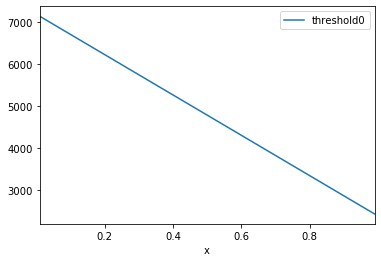

In [48]:
df.plot(kind='line', x='x', y='threshold0')